In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from env import *
import acquire as acq
#import warnings
#warnings.filterwarnings("ignore")

In [2]:
def get_store_data():
    filename = 'tsa_item_demand.csv'

    if not os.path.exists(filename):
        sql_db = "tsa_item_demand"
        url = get_db_url(sql_db)
        query = '''
                select * 
                from sales
                left join items using(item_id)
                left join stores using(store_id)
                '''
        df = pd.read_sql(query,url)
        df.to_csv(filename, index=False)
        print(f"Saving {filename}...")
        
        return df
    else:
        print(f"File {filename} already exists. Loading {filename}...")
        
        return pd.read_csv(filename,index_col=False)

In [3]:
store_df = get_store_data()

File tsa_item_demand.csv already exists. Loading tsa_item_demand.csv...


# Exercises

### Using your store items data:

# 1. Convert date column to datetime format.

In [4]:
# drop old columns from sql database
store_df = store_df.drop(columns = ["store_id","item_id","sale_id"])

In [5]:
store_df.head(3)

,sale_date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,2013-01-02,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,2013-01-03,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [6]:
store_df = store_df.sort_values("sale_date").reset_index()

In [7]:
store_df = store_df.drop(columns = ["index"])

In [8]:
store_df.dtypes

sale_date         object
sale_amount        int64
item_upc14         int64
item_upc12         int64
item_brand        object
item_name         object
item_price       float64
store_address     object
store_zipcode      int64
store_city        object
store_state       object
dtype: object

In [9]:
store_df['sale_date'] = pd.to_datetime(store_df['sale_date'])

In [10]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sale_date      913000 non-null  datetime64[ns]
 1   sale_amount    913000 non-null  int64         
 2   item_upc14     913000 non-null  int64         
 3   item_upc12     913000 non-null  int64         
 4   item_brand     913000 non-null  object        
 5   item_name      913000 non-null  object        
 6   item_price     913000 non-null  float64       
 7   store_address  913000 non-null  object        
 8   store_zipcode  913000 non-null  int64         
 9   store_city     913000 non-null  object        
 10  store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 76.6+ MB


In [121]:
store_df.shape

(913000, 13)

# 2. Plot the distribution of sale_amount and item_price.

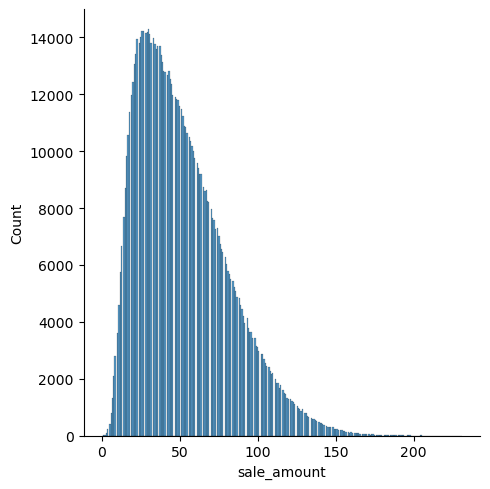

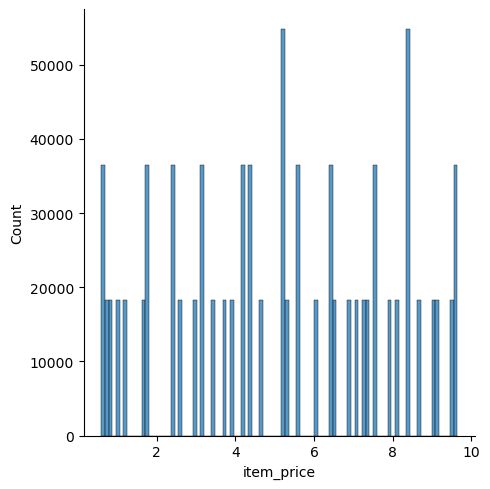

In [11]:
sns.displot(store_df["sale_amount"])
sns.displot(store_df["item_price"])
plt.show()

In [12]:
store_df["item_price"].min()

0.6

In [13]:
store_df["item_price"].max()

9.64

In [14]:
store_df["item_price"].unique()

array([0.84, 8.4 , 4.65, 6.47, 7.54, 4.4 , 3.17, 7.38, 3.93, 7.06, 1.16,
       4.39, 0.74, 5.17, 9.11, 2.43, 5.2 , 9.54, 3.14, 2.61, 6.44, 1.68,
       3.72, 1.79, 9.64, 6.93, 8.39, 9.02, 4.21, 0.68, 7.52, 0.6 , 8.65,
       5.19, 3.45, 9.59, 7.95, 6.52, 4.17, 8.09, 7.31, 2.97, 1.78, 5.62,
       0.98, 6.01, 5.34])

In [15]:
store_df["sale_amount"].unique()

array([ 13,  26,  27,  54,  35,  41,  23,  37,  51,  20,  49,  46,  33,
        38,  42,  56,  47,  43,  22,  30,  45,  29,  28,  36,  31,   9,
        25,  10,  12,  17,  55,  34,  44,  40,  18,  21,   6,  32,  52,
        19,  15,  24,  65,  61,   5,  48,  14,  57,  11,   4,   7,  16,
        39,  50,   8,  64,  59,  60,   2,  62,  71,  53,  58,  63,   3,
        67,  74,  66,  70,  68,  69,  83,  73,  76,  77,  75,  78,  97,
        72,  81,  79,  80,  84,  91,  86,  88,  85,  82,  89,  92,  98,
        87, 103,  99,  90,  93,  95, 101, 100,  94, 122,  96, 102, 119,
       105, 104, 107, 111, 109, 116, 106, 113, 110, 120, 114, 115, 108,
       118, 138, 112, 121, 128, 126, 117, 124, 127, 133, 132, 131, 123,
       136, 135, 134, 129, 142, 125, 139, 141, 130, 156, 137, 149, 145,
       146, 140, 157, 153, 151, 144, 147, 143, 148, 166, 160, 161, 163,
       169,   1,   0, 154, 150, 152, 155, 158, 171, 159, 164, 167, 165,
       168, 172, 162, 181, 174, 189, 170, 177, 173, 183, 175, 18

# 3. Set the index to be the datetime variable.

In [16]:
store_df = store_df.set_index("sale_date").sort_index()

# 4. Add a 'month' and 'day of week' column to your dataframe.

In [123]:
store_df['month'] = store_df.index.month_name()
store_df['day_of_week'] = store_df.index.day_name()

In [125]:
store_df.head(3)

,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,
2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,26,74676640211,74676640211,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,218.40
2013-01-01,27,35457770664,35457770664,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,125.55


# 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [18]:
store_df.columns

Index(['sale_amount', 'item_upc14', 'item_upc12', 'item_brand', 'item_name',
       'item_price', 'store_address', 'store_zipcode', 'store_city',
       'store_state', 'month', 'day_of_week'],
      dtype='object')

In [19]:
store_df["sales_total"] = store_df["sale_amount"]*store_df["item_price"]

# 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [20]:
def clean_store_data(df):
    # drop old columns from sql database
    df = df.drop(columns = ["store_id","item_id","sale_id"])
    
    # convert 'sale_date' column to datetime type
    df['sale_date'] = pd.to_datetime(df['sale_date'])
    # infer_datetime = True
    
    # set 'sale_date' column as index and sort it
    df = df.set_index("sale_date").sort_index()
    
    # feature engineer: add month & day of week using date index
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    
    # feature engineer: add 'sales_total' column multiplying 'sale_amount' & 'item_price'
    df["sales_total"] = df["sale_amount"]*df["item_price"]
    
    return df

<hr style="border:2px solid gray">

### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [21]:
energy_df = acq.get_energy_data()

File opsd_germany_daily.csv already exists.


# 1. Convert date column to datetime format.

In [23]:
energy_df.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [24]:
energy_df['Date']=pd.to_datetime(energy_df['Date'])

# 2. Plot the distribution of each of your variables.

In [27]:
numeric_columns = energy_df.select_dtypes(include=[np.number]).columns

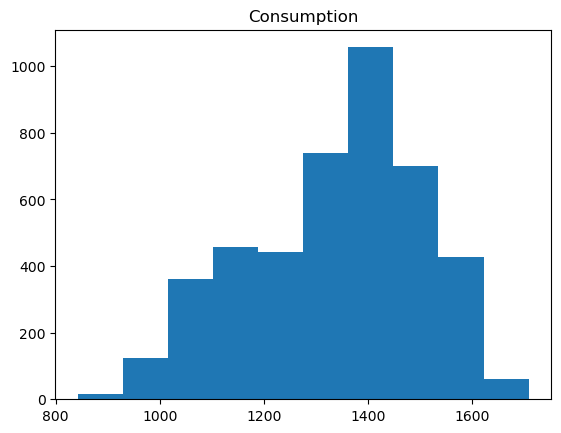

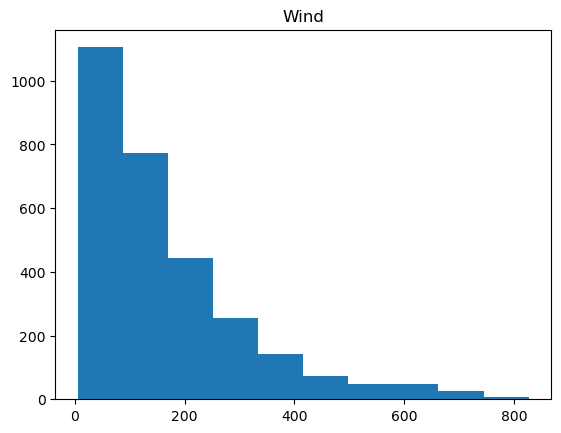

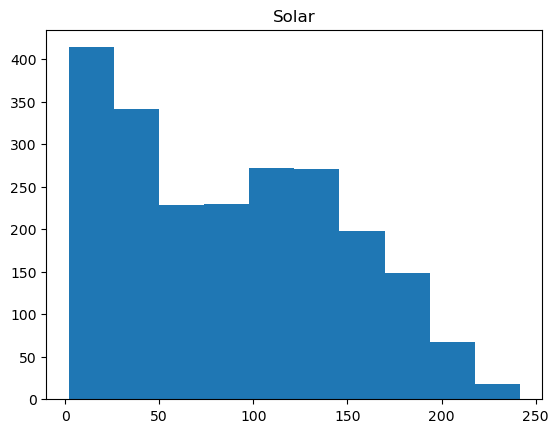

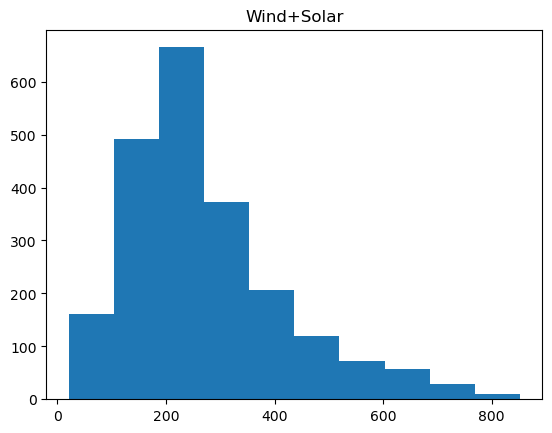

In [28]:
for column in numeric_columns:
    plt.hist(energy_df[column])
    plt.title(column)
    plt.show()

# 3. Set the index to be the datetime variable.

In [119]:
energy_df.columns

Index(['Consumption', 'month', 'year', 'Wind_Solar', 'Solar', 'Wind'], dtype='object')

In [30]:
energy_df = energy_df.set_index("Date").sort_index()

# 4. Add a month and a year column to your dataframe.

In [32]:
energy_df['month'] = energy_df.index.month_name()
energy_df['year'] = energy_df.index.year

# 5. Fill any missing values.

In [110]:
energy_df = energy_df.assign(Wind_Solar=lambda df: energy_df["Wind+Solar"].bfill())
energy_df = energy_df.assign(Fixed_Solar=lambda df: energy_df["Solar"].bfill())
energy_df = energy_df.assign(Fixed_Wind=lambda df: energy_df["Wind"].bfill())

In [111]:
energy_df = energy_df.drop(columns = ['Wind','Solar','Wind+Solar'])

In [115]:
energy_df = energy_df.rename(columns={"Fixed_Solar": "Solar", "Fixed_Wind": "Wind"})

In [118]:
energy_df.isnull().sum()

Consumption    0
month          0
year           0
Wind_Solar     0
Solar          0
Wind           0
dtype: int64

# 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [120]:
def clean_energy_data(df):
    # fix datatype of 'Date' column
    df['Date']=pd.to_datetime(df['Date'])
    
    # set 'Date' column as index and sorted
    df = df.set_index("Date").sort_index()
    
    # feature engineering: added 'month' column using index
    df['month'] = df.index.month
    
    # feature engineering: added 'year' column using index
    df['year'] = df.index.year
    
    # N U L L S
    # removed nulls from ['Wind','Solar','Wind_Solar'] columns
    # by backfilling and added as new columns
    df = df.assign(Wind_Solar=lambda df: df["Wind+Solar"].bfill())
    df = df.assign(Fixed_Solar=lambda df: df["Solar"].bfill())
    df = df.assign(Fixed_Wind=lambda df: df["Wind"].bfill())
    
    # dropped the old null columns
    df = df.drop(columns = ['Wind','Solar','Wind+Solar'])
    
    # renamed backfilled column names
    df = df.rename(columns={"Fixed_Solar": "Solar", "Fixed_Wind": "Wind"})